In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import KFold

In [4]:
X = np.array([[1, 2], [3, 4], [5, 2], [9, 6]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [5]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [6]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [7]:
X_train

array([[1, 2],
       [3, 4]])

In [8]:
X_test


array([[5, 2],
       [9, 6]])

In [9]:
y_train

array([1, 2])

In [10]:
y_test

array([3, 4])

In [11]:
import pandas as pd

In [12]:
glass0 = pd.read_csv('glass0_CSV.csv', 
                 sep=",\s+", #separator whitespace
                 header=None)

C:\Users\HP\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
glass0.head()

,0,1,2,3,4,5,6,7,8,9
0,"""1.51588824",12.87795,3.43036,1.40066,73.2820,0.68931,8.04468,0.0,0.1224,"positive"""
1,"""1.5176423",12.97770,3.53812,1.21127,73.0020,0.65205,8.52888,0.0,0.0000,"positive"""
2,"""1.52212996",14.20795,3.82099,0.46976,71.7700,0.11178,9.57260,0.0,0.0000,"positive"""
3,"""1.52222108",13.21045,3.77160,0.79076,71.9884,0.13041,10.24520,0.0,0.0000,"positive"""
4,"""1.51755118",13.39000,3.65935,1.18880,72.7892,0.57132,8.27064,0.0,0.0561,"positive"""


In [14]:
glass0.columns =['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe', 'Class']

In [15]:
glass0.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,"""1.51588824",12.87795,3.43036,1.40066,73.2820,0.68931,8.04468,0.0,0.1224,"positive"""
1,"""1.5176423",12.97770,3.53812,1.21127,73.0020,0.65205,8.52888,0.0,0.0000,"positive"""
2,"""1.52212996",14.20795,3.82099,0.46976,71.7700,0.11178,9.57260,0.0,0.0000,"positive"""
3,"""1.52222108",13.21045,3.77160,0.79076,71.9884,0.13041,10.24520,0.0,0.0000,"positive"""
4,"""1.51755118",13.39000,3.65935,1.18880,72.7892,0.57132,8.27064,0.0,0.0561,"positive"""


In [17]:
for i, row in glass0.iterrows():
    glass0.at[i, 'RI']=glass0.at[i, 'RI'].replace("\"", "")
    glass0.at[i, 'Class']=glass0.at[i, 'Class'].replace("\"", "")

In [19]:
for i, row in glass0.iterrows():
    str=glass0.at[i, 'Class']
    if(str=='positive'):
        glass0.at[i, 'Class']=1;
    else:
        glass0.at[i, 'Class']=0;

In [20]:
glass0['RI'] = pd.to_numeric(glass0['RI'], errors='coerce')

In [21]:
glass0['Class'] = pd.to_numeric(glass0['Class'], errors='coerce')

In [22]:
x=glass0[['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']]

In [23]:
y=glass0['Class']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
x_train, x_test, y_train, y_test= train_test_split (x,y,test_size=0.3)

In [26]:
x_train.shape

(149, 9)

In [27]:
knnclassifier=KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train, y_train)
y_pred=knnclassifier.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7846153846153846

In [28]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
knnclassifier=KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knnclassifier, x, y, cv=10, scoring ="accuracy").mean())

0.7523809523809524


In [31]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [32]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring ="accuracy").mean())

0.7015151515151514


In [33]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

0.7076923076923077

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
svm=SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.7384615384615385

In [36]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [37]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [38]:
get_score(SVC(), x_train, x_test, y_train, y_test)

0.7384615384615385

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
testdata=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [41]:
testdata.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

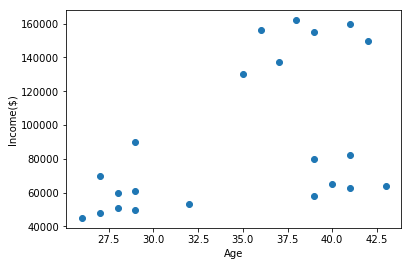

In [42]:
plt.scatter(testdata['Age'],testdata['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(testdata[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [44]:
testdata['cluster']=y_predicted

In [45]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

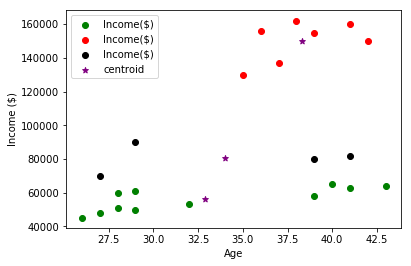

In [46]:
df1 = testdata[testdata.cluster==0]
df2 = testdata[testdata.cluster==1]
df3 = testdata[testdata.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [47]:
scaler = MinMaxScaler()

scaler.fit(testdata[['Income($)']])
testdata['Income($)'] = scaler.transform(testdata[['Income($)']])

scaler.fit(testdata[['Age']])
testdata['Age'] = scaler.transform(testdata[['Age']])

C:\Users\HP\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\HP\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


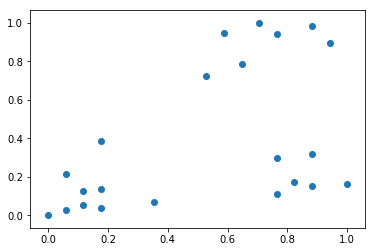

In [48]:
plt.scatter(testdata.Age,testdata['Income($)'])

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(testdata[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [50]:
testdata['cluster']=y_predicted

In [51]:
testdata.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


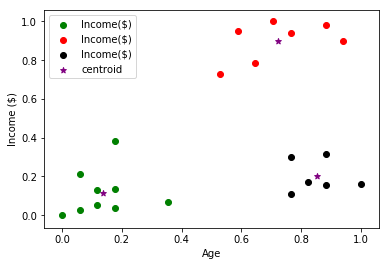

In [52]:
df1 = testdata[testdata.cluster==0]
df2 = testdata[testdata.cluster==1]
df3 = testdata[testdata.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(testdata[['Age','Income($)']])
    sse.append(km.inertia_)

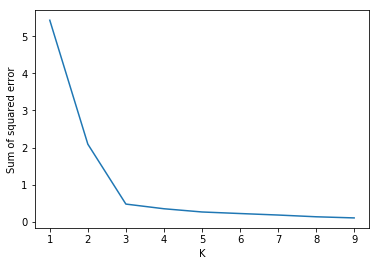

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [55]:
x_train, x_test, y_train, y_test= train_test_split (x,y,test_size=0.2)

In [56]:
x_train.shape


(171, 9)

In [57]:
x_test.shape

(43, 9)

In [58]:
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
63,1.517665,13.21045,3.69078,1.29152,72.6100,0.57132,8.21684,0.0,0.0000
47,1.526663,13.98850,3.69976,0.71051,71.5684,0.01863,9.82008,0.0,0.0510
45,1.517506,12.81810,3.55159,1.49054,72.7500,0.54027,8.51812,0.0,0.0969
30,1.521515,13.05085,3.65037,0.87101,72.3188,0.19251,9.85236,0.0,0.0867
102,1.518462,13.09740,3.96916,1.18880,72.4420,0.60237,8.43204,0.0,0.0000


In [59]:
train_set=x_train

In [108]:
x_train.shape

(171, 10)

In [109]:
x_test.shape

(43, 9)

In [60]:
train_set['Class']=y_train

C:\Users\HP\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
train_set.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
63,1.517665,13.21045,3.69078,1.29152,72.6100,0.57132,8.21684,0.00000,0.0000,1
47,1.526663,13.98850,3.69976,0.71051,71.5684,0.01863,9.82008,0.00000,0.0510,1
45,1.517506,12.81810,3.55159,1.49054,72.7500,0.54027,8.51812,0.00000,0.0969,1
30,1.521515,13.05085,3.65037,0.87101,72.3188,0.19251,9.85236,0.00000,0.0867,1
102,1.518462,13.09740,3.96916,1.18880,72.4420,0.60237,8.43204,0.00000,0.0000,0
206,1.516093,15.12600,0.00000,2.51132,73.0524,0.04968,8.83016,0.52920,0.0000,0
78,1.516458,13.40995,3.55159,1.24979,72.8116,0.68310,8.09848,0.00000,0.0000,0
185,1.516139,13.88210,1.77804,1.78907,73.0972,0.00000,8.66876,0.75915,0.0000,0
209,1.517278,14.70005,0.00000,2.34119,73.2820,0.00000,8.94852,0.66150,0.0000,0
32,1.515706,12.71835,3.46179,1.56116,73.1980,0.67068,8.08772,0.00000,0.1224,1


In [62]:
majority=train_set[train_set['Class']==0]
minority=train_set[train_set['Class']==1]

In [63]:
majority.shape


(111, 10)

In [64]:
minority.shape

(60, 10)

In [65]:
x_test.shape

(43, 9)

In [66]:
test_set=x_test

In [67]:
test_set['Class']=y_test

C:\Users\HP\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
test_set.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
90,1.516891,13.33015,3.53812,1.60931,72.5428,0.68310,8.10924,0.0,0.0,0
75,1.526640,11.22875,0.00000,0.77150,73.2092,0.00000,14.68360,0.0,0.0,0
38,1.517620,12.81145,3.53812,1.23053,73.2372,0.57753,8.38900,0.0,0.0,1
74,1.516891,12.67180,2.87809,1.70882,73.2092,0.73278,8.53964,0.0,0.0,0
12,1.517620,13.88875,3.60098,1.35893,72.7276,0.47817,7.82948,0.0,0.0,1


In [68]:
train_set.shape

(171, 10)

In [70]:
k= len(minority) #K for K-means clustering

In [71]:
km = KMeans(n_clusters=k)
y_predicted = km.fit_predict(majority[['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']])
y_predicted

array([30, 25, 39, 35, 25, 54, 23,  5,  3, 28, 55, 30, 52, 39,  2,  5, 59,
       56, 53,  6, 17, 33, 55, 50, 45, 24,  3, 59, 15, 48, 59, 40, 25, 20,
        8, 52, 32, 30, 44, 49, 12, 42,  7, 27, 46, 30, 40, 55, 13, 51, 59,
       14, 26, 49,  6, 41, 30,  9, 38, 32, 57, 42, 48, 59, 42, 18, 43,  6,
       22, 42, 36, 21, 19, 39,  4, 37, 38, 32, 20, 30, 34, 39, 49, 58, 39,
       38, 25, 36, 10, 36, 36, 11,  8, 59,  5, 29, 55,  8, 38,  8,  0, 11,
       49, 36, 55, 18, 31, 39,  1, 47, 16])

In [72]:
cluster_centers=km.cluster_centers_

In [73]:
cluster_centers

array([[1.51654886e+00, 1.27516000e+01, 2.85115000e+00, 1.43918000e+00,
        7.32708000e+01, 5.71320000e-01, 8.78712000e+00, 1.10250000e-01,
        1.12200000e-01],
       [1.52222108e+00, 1.44274000e+01, 0.00000000e+00, 9.99410000e-01,
        7.26716000e+01, 9.93600000e-02, 1.15201600e+01, 0.00000000e+00,
        4.08000000e-02],
       [1.51622994e+00, 1.42013000e+01, 0.00000000e+00, 2.79059000e+00,
        7.34612000e+01, 3.72600000e-02, 9.04536000e+00, 4.00050000e-01,
        4.59000000e-01],
       [1.51317742e+00, 1.30076250e+01, 0.00000000e+00, 3.02973500e+00,
        7.05912000e+01, 6.21000000e+00, 6.94178000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.52474966e+00, 1.14482000e+01, 0.00000000e+00, 1.87895000e+00,
        7.21900000e+01, 8.07300000e-01, 1.32417600e+01, 0.00000000e+00,
        1.73400000e-01],
       [1.51582749e+00, 1.31971500e+01, 3.41240000e+00, 1.50766000e+00,
        7.32017333e+01, 2.79450000e-01, 8.21325333e+00, 0.00000000e+00,
        3.2

In [74]:
majority.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
102,1.518462,13.09740,3.96916,1.18880,72.4420,0.60237,8.43204,0.00000,0.0,0
206,1.516093,15.12600,0.00000,2.51132,73.0524,0.04968,8.83016,0.52920,0.0,0
78,1.516458,13.40995,3.55159,1.24979,72.8116,0.68310,8.09848,0.00000,0.0,0
185,1.516139,13.88210,1.77804,1.78907,73.0972,0.00000,8.66876,0.75915,0.0,0
209,1.517278,14.70005,0.00000,2.34119,73.2820,0.00000,8.94852,0.66150,0.0,0


In [77]:
balanced_majority = pd.DataFrame(cluster_centers)

In [78]:
balanced_majority.head()

,0,1,2,3,4,5,6,7,8
0,1.516549,12.751600,2.85115,1.439180,73.2708,0.57132,8.78712,0.11025,0.1122
1,1.522221,14.427400,0.00000,0.999410,72.6716,0.09936,11.52016,0.00000,0.0408
2,1.516230,14.201300,0.00000,2.790590,73.4612,0.03726,9.04536,0.40005,0.4590
3,1.513177,13.007625,0.00000,3.029735,70.5912,6.21000,6.94178,0.00000,0.0000
4,1.524750,11.448200,0.00000,1.878950,72.1900,0.80730,13.24176,0.00000,0.1734


In [80]:
balanced_majority.columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']

In [81]:
balanced_majority.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.516549,12.751600,2.85115,1.439180,73.2708,0.57132,8.78712,0.11025,0.1122
1,1.522221,14.427400,0.00000,0.999410,72.6716,0.09936,11.52016,0.00000,0.0408
2,1.516230,14.201300,0.00000,2.790590,73.4612,0.03726,9.04536,0.40005,0.4590
3,1.513177,13.007625,0.00000,3.029735,70.5912,6.21000,6.94178,0.00000,0.0000
4,1.524750,11.448200,0.00000,1.878950,72.1900,0.80730,13.24176,0.00000,0.1734


In [82]:
balanced_majority['Class']=0

In [83]:
balanced_majority.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.516549,12.751600,2.85115,1.439180,73.2708,0.57132,8.78712,0.11025,0.1122,0
1,1.522221,14.427400,0.00000,0.999410,72.6716,0.09936,11.52016,0.00000,0.0408,0
2,1.516230,14.201300,0.00000,2.790590,73.4612,0.03726,9.04536,0.40005,0.4590,0
3,1.513177,13.007625,0.00000,3.029735,70.5912,6.21000,6.94178,0.00000,0.0000,0
4,1.524750,11.448200,0.00000,1.878950,72.1900,0.80730,13.24176,0.00000,0.1734,0


In [84]:
minority.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
63,1.517665,13.21045,3.69078,1.29152,72.6100,0.57132,8.21684,0.0,0.0000,1
47,1.526663,13.98850,3.69976,0.71051,71.5684,0.01863,9.82008,0.0,0.0510,1
45,1.517506,12.81810,3.55159,1.49054,72.7500,0.54027,8.51812,0.0,0.0969,1
30,1.521515,13.05085,3.65037,0.87101,72.3188,0.19251,9.85236,0.0,0.0867,1
32,1.515706,12.71835,3.46179,1.56116,73.1980,0.67068,8.08772,0.0,0.1224,1


In [85]:
minority.shape

(60, 10)

In [86]:
balanced_majority.shape

(60, 10)

In [93]:
balanced_train_set=pd.concat([minority, balanced_majority],ignore_index=True)

In [94]:
balanced_train_set.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.517665,13.21045,3.69078,1.29152,72.6100,0.57132,8.21684,0.0,0.0000,1
1,1.526663,13.98850,3.69976,0.71051,71.5684,0.01863,9.82008,0.0,0.0510,1
2,1.517506,12.81810,3.55159,1.49054,72.7500,0.54027,8.51812,0.0,0.0969,1
3,1.521515,13.05085,3.65037,0.87101,72.3188,0.19251,9.85236,0.0,0.0867,1
4,1.515706,12.71835,3.46179,1.56116,73.1980,0.67068,8.08772,0.0,0.1224,1
5,1.517551,13.15060,3.60996,1.05077,73.2372,0.57132,8.23836,0.0,0.0000,1
6,1.517620,12.61195,3.59200,1.31078,73.2876,0.57753,8.49660,0.0,0.0000,1
7,1.521515,13.11735,3.57853,0.89990,72.2012,0.22977,9.82008,0.0,0.0816,1
8,1.517642,12.97770,3.53812,1.21127,73.0020,0.65205,8.52888,0.0,0.0000,1
9,1.519009,13.48975,3.47975,1.34930,71.9492,0.55269,9.00232,0.0,0.0000,1


In [96]:
balanced_train_set= balanced_training_set.sample(frac=1).reset_index(drop=True)

In [97]:
balanced_train_set.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.519100,13.902050,3.731190,1.179170,72.12280,0.062100,8.894720,0.000000,0.00000,1
1,1.522472,14.859650,2.200100,2.058710,70.25800,0.757620,9.755520,0.000000,0.00000,0
2,1.517551,13.390000,3.659350,1.188800,72.78920,0.571320,8.270640,0.000000,0.05610,1
3,1.533930,12.299400,0.000000,0.999410,70.16280,0.117990,16.190000,0.000000,0.12240,0
4,1.518986,13.582850,3.349540,1.230530,72.07800,0.589950,8.905480,0.000000,0.00000,1
5,1.516389,14.907950,0.000000,2.375698,73.22880,0.012420,8.811330,0.625275,0.11475,0
6,1.516230,14.201300,0.000000,2.790590,73.46120,0.037260,9.045360,0.400050,0.45900,0
7,1.516093,13.033560,3.539916,1.507232,73.17112,0.669438,7.891888,0.000000,0.00000,0
8,1.518075,13.429900,2.869110,1.188800,72.83960,0.552690,9.034600,0.000000,0.00000,1
9,1.517847,12.678450,3.668330,1.159910,73.10840,0.608580,8.701040,0.000000,0.00000,1


In [98]:
balanced_train_set.shape

(120, 10)

In [99]:
test_set.shape

(43, 10)

In [100]:
x_test=test_set[['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']]
y_test=test_set['Class']

In [110]:
x_train=train_set[['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']]
y_train=train_set['Class']

In [111]:
balanced_x_train=balanced_train_set[['RI', 'Na', 'Mg', 'Al', 'Si', 'K','Ca', 'Ba', 'Fe']]
balanced_y_train=balanced_train_set['Class']

In [112]:
svm=SVC()
svm.fit(balanced_x_train, balanced_y_train)
svm.score(x_test, y_test)

0.5813953488372093

In [114]:
svm=SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.813953488372093

In [115]:
x_train.shape

(171, 9)

In [116]:
balanced_x_train.shape

(120, 9)

In [117]:
#0train, 1train, 0balanced, 1balanced

In [122]:
train_set.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
63,1.517665,13.21045,3.69078,1.29152,72.6100,0.57132,8.21684,0.0,0.0000,1
47,1.526663,13.98850,3.69976,0.71051,71.5684,0.01863,9.82008,0.0,0.0510,1
45,1.517506,12.81810,3.55159,1.49054,72.7500,0.54027,8.51812,0.0,0.0969,1
30,1.521515,13.05085,3.65037,0.87101,72.3188,0.19251,9.85236,0.0,0.0867,1
102,1.518462,13.09740,3.96916,1.18880,72.4420,0.60237,8.43204,0.0,0.0000,0


In [126]:
train1=0
train0=0
for i, row in train_set.iterrows():
    data=train_set.at[i, 'Class']
    if(data==1):
        train1=train1+1
    else:
        train0=train0+1

In [127]:
bal1=0
bal0=0
for i, row in balanced_train_set.iterrows():
    data=balanced_train_set.at[i, 'Class']
    if(data==1):
        bal1=bal1+1
    else:
        bal0=bal0+1

In [128]:
print(train0, train1)
print(bal0, bal1)

111 60
60 60


In [129]:
svm=SVC()
svm.fit(balanced_x_train, balanced_y_train)
svm.score(x_test, y_test)

0.5813953488372093

In [130]:
svm=SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.813953488372093